In [1]:
import numpy as np
import math
from enum import Enum
from collections import namedtuple
# matplotlib
# ライブラリーのインポート
import matplotlib.pyplot as plt
# インライン表示
%matplotlib inline
# 日本語フォント
import pylab
from matplotlib.font_manager import FontProperties
# 日本語フォント
fp = FontProperties(fname='C:\WINDOWS\Fonts\msgothic.ttc', size = 12)

# 第四章　暖冷房設備

# 第二節　ダクト式セントラル空調機

## 5.　最大暖房出力

日付$d$の時刻$t$における1時間当たりの最大暖房出力$Q_{max,H,d,t}$は、式(1)により表される。

$$ 
\begin{equation*}
    Q_{max,H,d,t} = q_{ac,rtd,H} \times C_{df,d,t} \times 3600 \times 10^{-6}
\end{equation*}
$$


<div style="text-align: right;"> (1) </div>

ここで、  

$Q_{max,H,d,t}$：日付$d$の時刻$t$における1時間当たりの最大暖房出力(MJ/h)  
$q_{ac,rtd,H}$：空調機の定格暖房能力(W)  
$C_{df,d,t}$：日付$d$の時刻$t$におけるデフロストに関する暖房出力補正係数(-)  

である。

空調機の定格暖房能力$q_{ac,rtd,H}$は、付録Aにより定まる。

In [2]:
def Q_max_H(q_ac_rtd_H, C_df):
    '''最大暖房出力(MJ/h)を計算する'''
    # q_ac_rtd_H: 空調機の定格暖房能力(W)
    # C_df: デフロストに関する暖房出力補正係数(-)

    return q_ac_rtd_H * C_df * 3600 * 10**(-6)

日付$d$の時刻$t$におけるデフロストに関する暖房出力補正係数$C_{df,d,t}$は、外気温度$\theta_{ex,d,t}$が5℃未満かつ外気相対湿度$h_{ex,d,t}$が80%以上の場合にデフロストが発生すると仮定して、式(2)により定まる。

<p style="text-indent:2em">外気温度$\theta_{ex,d,t}$が5℃未満かつ外気相対湿度$h_{ex,d,t}$が80%以上の場合：</p>  
$$ 
\begin{equation*}
   C_{df,d,t} = 0.77
\end{equation*}
$$


<div style="text-align: right;"> (2-1) </div>

<p style="text-indent:2em">外気温度$\theta_{ex,d,t}$が5℃以上かつ外気相対湿度$h_{ex,d,t}$が80%未満の場合：</p>  
$$ 
\begin{equation*}
   C_{df,d,t} = 1.0
\end{equation*}
$$


<div style="text-align: right;"> (2-2) </div>

ここで、  

$C_{df,d,t}$：日付$d$の時刻$t$におけるデフロストに関する暖房出力補正係数(-)  
$h_{ex,d,t}$：日付$d$の時刻$t$における外気相対湿度(%)  
$\theta_{ex,d,t}$：日付$d$の時刻$t$における外気温度(℃)  

である。

In [3]:
def get_C_df(theta_ex, h_ex):
    '''デフロストに関する暖房出力補正係数(-)を取得する'''
    # theta_ex: 外気温度(℃)
    # h_ex: 外気相対湿度(%)
    
    if theta_ex < 5 and 80<= h_ex:
        return  0.77
    else:
        return  1.0

Example

In [4]:
np.vectorize(get_C_df)([[4],[5],[6]],[79,80,81])

array([[ 1.  ,  0.77,  0.77],
       [ 1.  ,  1.  ,  1.  ],
       [ 1.  ,  1.  ,  1.  ]])

In [5]:
Q_max_H(1000, get_C_df(20, 70))

3.5999999999999996

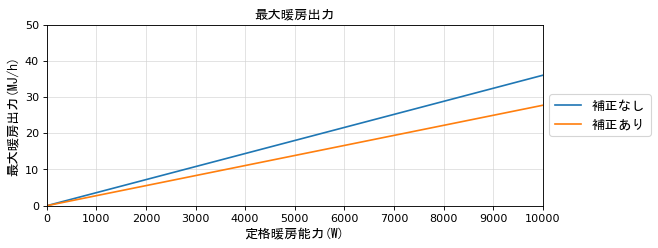

In [6]:
# 出力結果
plt.figure(figsize = (8, 3), dpi=80 )
plt.subplot2grid((1, 1), (0, 0))
plt.title('最大暖房出力', fontdict={'fontproperties':fp})

for i,category in enumerate(['補正なし','補正あり']):
    x_values =[x for x in range(0, 10000)]
    y_values = {'補正なし' :[Q_max_H(x, get_C_df(20, 70)) for x in x_values],
                '補正あり' :[Q_max_H(x, get_C_df( 0, 90)) for x in x_values]}[category]
    plt.plot(x_values, y_values, label=category)
        
ax=plt.gca()
ax.set_xlabel('定格暖房能力(W)', fontdict={'fontproperties':fp})
ax.set_xticks([x for x in range(0, 11000, 1000)], minor=False)
ax.set_xbound(lower=0, upper=10000)

ax.set_ylabel('最大暖房出力(MJ/h)', fontdict={'fontproperties':fp})
ax.set_yticks([y for y in range(0, 60, 10)], minor=False)
ax.set_ybound(lower=0, upper=50)

ax.grid(which='major', color='lightgray', alpha=0.7, linestyle='-')     
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=0.5, frameon=True, prop=fp)

plt.show()

## 6.　暖房エネルギー消費量

### 6.1　消費電力量

日付$d$の時刻$t$における1時間当たりの消費電力量$E_{E,H,d,t}$は、式(3)により表される。

<p style="text-indent:2em">TG案：</p> 
$$ 
\begin{equation*}
    E_{E,H,d,t} = \left( E_{E,comp,H,d,t} + E_{E,fan,H,d,t} \right) \times C_{DL}
\end{equation*}
$$


<div style="text-align: right;"> (3) </div>

ここで、  

$C_{DL}$：断熱区画外ダクト熱損失による消費電力量補正係数(-)  
$E_{E,fan,H,d,t}$：日付$d$の時刻$t$における暖房時の1時間当たりの空気搬送ファンの消費電力量(kWh/h)  
$E_{E,comp,H,d,t}$：日付$d$の時刻$t$における暖房時の1時間当たりの圧縮機の消費電力量(kWh/h)  
$E_{E,H,d,t}$：日付$d$の時刻$t$における1時間当たりの暖房の消費電力量(kWh/h)  

である。

<p style="text-indent:2em">修正案：</p> 
$$ 
\begin{equation*}
    E_{E,H,d,t} = E_{E,comp,H,d,t} \times C_{DL} + E_{E,fan,H,d,t} 
\end{equation*}
$$


<div style="text-align: right;"> (3) </div>

ここで、  

$C_{DL}$：断熱区画外ダクト熱損失による消費電力量補正係数(-)  
$E_{E,fan,H,d,t}$：日付$d$の時刻$t$における1時間当たりの空気搬送ファンの消費電力量のうちの暖房設備への負荷分(kWh/h)  
$E_{E,comp,H,d,t}$：日付$d$の時刻$t$における暖房時の1時間当たりの圧縮機の消費電力量(kWh/h)  
$E_{E,H,d,t}$：日付$d$の時刻$t$における1時間当たりの暖房の消費電力量(kWh/h)  

である。

断熱区画外ダクト熱損失による消費電力量補正係数$C_{DL}$は、付録Cにより定まる。

In [7]:
def E_E_H(E_E_comp_H, E_E_fan_H, C_DL):
    '''暖房の消費電力量(kWh/h)を計算する'''
    # E_E_comp_H：圧縮機の消費電力量(kWh/h)  
    # E_E_fan_H：空気搬送ファンの消費電力量(kWh/h)
    # C_DL：断熱区画外ダクト熱損失による消費電力量補正係数(-)  
    
    return (E_E_comp_H + E_E_fan_H) * C_DL

In [8]:
def E_E_H_rev(E_E_comp_H, E_E_fan_H, C_DL):
    '''暖房の消費電力量(kWh/h)を計算する'''
    # E_E_comp_H：圧縮機の消費電力量(kWh/h)  
    # E_E_fan_H：空気搬送ファンの消費電力量(kWh/h)
    # C_DL：断熱区画外ダクト熱損失による消費電力量補正係数(-)  
    
    return E_E_comp_H * C_DL + E_E_fan_H

### 6.2　ガス消費量

（省略）

### 6.3　石油消費量

（省略）

### 6.4　その他の燃料による一次エネルギー消費量

（省略）

## 7.　最大冷房出力

（省略）

## 8.　冷房エネルギー消費量

（省略）

## 9.　換気エネルギー消費量

（工事中）

## 10.　圧縮機

### 10.1　消費電力量

#### 10.1.1　暖房

日付$d$の時刻$t$における1時間当たりの圧縮機の消費電力量$E_{E,comp,H,d,t}$は、式(@)により表される。

<p style="text-indent:2em">TG案：</p> 
<p style="text-indent:2em">最小・中間・定格、もしくは中間・定格の仕様が既知の場合：</p> 
$$ 
\begin{equation*}
    E_{E,comp,H,d,t} = \frac{{Q'_{T,H,d,t}}} {e_{th,H,d,t} \times r_{comp,H,d,t}}
\end{equation*}
$$

<p style="text-indent:2em">定格の仕様のみが既知の場合：（数式を省略。現行法と同じ。）</p>

<div style="text-align: right;"> (@) </div>

<p style="text-indent:2em">修正案：</p> 
$$ 
\begin{equation*}
    E_{E,comp,H,d,t} = \frac{{Q_{T,H,d,t}}} {e_{th,H,d,t} \times r_{comp,H,d,t} \times C_{df,d,t}}
\end{equation*}
$$


<div style="text-align: right;"> (@) </div>

ここで、  

$E_{E,comp,H,d,t}$：日付$d$の時刻$t$における暖房時の1時間当たりの圧縮機の消費電力量(kWh/h)  
$e_{th,H,d,t}$：日付$d$の時刻$t$におけるヒートポンプサイクルの理論暖房効率(-)  
$Q'_{T,H,d,t}$：日付$d$の時刻$t$における1時間当たりの補正処理暖房負荷(MJ/h)  
$r_{comp,H,d,t}$：日付$d$の時刻$t$におけるヒートポンプサイクルの理論暖房効率に対する圧縮機の暖房効率の比(-)  

である。

日付$d$の時刻$t$におけるヒートポンプサイクルの理論暖房効率$e_{th,H}$は、付録Dにより計算される値とする。

In [9]:
def E_E_comp_H(Q_dash_T_H, e_th_H, r_comp_H):
    '''暖房時の圧縮機の消費電力量(kWh/h)を計算する'''
    # Q_dash_T_H：補正処理暖房負荷(MJ/h)  
    # e_th_H：ヒートポンプサイクルの理論暖房効率(-)  
    # r_comp_Hz：ヒートポンプサイクルの理論暖房効率に対する圧縮機の暖房効率の比(-)  
    
    return Q_dash_T_H / (e_th_H * r_comp_H)

In [10]:
def E_E_comp_H_rev(Q_T_H, e_th_H, r_comp_H, C_df):
    '''暖房時の圧縮機の消費電力量(kWh/h)を計算する'''
    # Q_T_H：処理暖房負荷(MJ/h)  
    # e_th_H：ヒートポンプサイクルの理論暖房効率(-)  
    # r_comp_Hz：ヒートポンプサイクルの理論暖房効率に対する圧縮機の暖房効率の比(-)  
    # C_df: デフロストに関する暖房出力補正係数(-)
    
    return Q_T_H / (e_th_H * r_comp_H * C_df)

日付$d$の時刻$t$における1時間当たりの補正暖房処理負荷$Q'_{T,H,d,t}$は、式(@)により表される。

<p style="text-indent:2em">TG案：</p> 
$$ 
\begin{equation*}
    Q'_{T,H,d,t} = \frac{Q_{T,H,d,t}} {C_{df,d,t}}
\end{equation*}
$$


<div style="text-align: right;"> (@) </div>

<p style="text-indent:2em">修正案：$Q'_{T,H,d,t}$を削除。以降の計算では、$Q'_{T,H,d,t}$ => $Q_{T,H,d,t}$</p> 

ここで、  

$C_{df,d,t}$：日付$d$の時刻$t$におけるデフロストに関する暖房出力補正係数(-)  
$Q_{T,H,d,t}$：日付$d$の時刻$t$における1時間当たりの処理暖房負荷(MJ/h)  
$Q'_{T,H,d,t}$：日付$d$の時刻$t$における1時間当たりの補正処理暖房負荷(MJ/h)  

である。

In [11]:
def Q_dash_T_H(Q_T_H, C_df):
    '''補正処理暖房負荷(MJ/h)を計算する'''
    # Q_T_H：処理暖房負荷(MJ/h)  
    # C_df: デフロストに関する暖房出力補正係数(-)
    
    return Q_T_H / C_df

Example

In [12]:
E_E_comp_H(Q_dash_T_H(1000, get_C_df(20, 70)), 3, 1.0)

333.3333333333333

#### 10.1.2　冷房

（工事中）

### 10.2　ヒートポンプサイクルの理論効率に対する圧縮機効率の比

#### 10.2.1　暖房

日付$d$の時刻$t$におけるヒートポンプサイクルの理論暖房効率に対する圧縮機の暖房効率の比$r_{comp,H,d,t}$は、式(@)により表される。

<p style="text-indent:2em">$Q'_{T,H,d,t} \div \left( 3600 \times 10^{-6} \right) \leq q_{ac,min, H}$の場合：</p> 
$$ 
\begin{equation*}
    r_{comp,H,d,t} = r_{comp,min,H} - \left\{ q_{ac,min,H} - Q'_{T,H,d,t} \div \left( 3600 \times 10^{-6} \right) \right\} \times \frac{r_{comp,min,H}}{q_{ac,min,H}}
\end{equation*}
$$

<div style="text-align: right;"> (@-1) </div>

<p style="text-indent:2em">$q_{ac,min, H} < Q'_{T,H,d,t} \div \left( 3600 \times 10^{-6} \right) \leq q_{ac,mid, H} $の場合：</p> 
$$ 
\begin{equation*}
    r_{comp,H,d,t} = r_{comp,mid,H} - \left\{ q_{ac,mid,H} - Q'_{T,H,d,t} \div \left( 3600 \times 10^{-6} \right) \right\} \times \frac{r_{comp,mid,H} - r_{comp,min,H}}{q_{ac,mid,H} - q_{ac,min,H}}
\end{equation*}
$$

<div style="text-align: right;"> (@-2) </div>

<p style="text-indent:2em">$q_{ac,mid, H} < Q'_{T,H,d,t} \div \left( 3600 \times 10^{-6} \right) \leq q_{ac,rtd, H} $の場合：</p> 
$$ 
\begin{equation*}
    r_{comp,H,d,t} = r_{comp,rtd,H} - \left\{ q_{ac,rtd,H} - Q'_{T,H,d,t} \div \left( 3600 \times 10^{-6} \right) \right\} \times \frac{r_{comp,rtd,H} - r_{comp,mid,H}}{q_{ac,rtd,H} - q_{ac,mid,H}}
\end{equation*}
$$

<div style="text-align: right;"> (@-3) </div>

<p style="text-indent:2em">$q_{ac,rtd, H} < Q'_{T,H,d,t} \div \left( 3600 \times 10^{-6} \right)$の場合：</p> 
$$ 
\begin{equation*}
    r_{comp,H,d,t} = max \left( 0.4, \: r_{comp,rtd,H} - \left\{ q_{ac,rtd,H} - Q'_{T,H,d,t} \div \left( 3600 \times 10^{-6} \right) \right\} \times \frac{r_{comp,rtd,H}}{q_{ac,rtd,H}} \right)
\end{equation*}
$$

<div style="text-align: right;"> (@-4) </div>

ここで、  

$Q'_{T,H,d,t}$：日付$d$の時刻$t$における1時間当たりの補正処理暖房負荷(MJ/h)  
$r_{comp,H,d,t}$：日付$d$の時刻$t$におけるヒートポンプサイクルの理論暖房効率に対する圧縮機の暖房効率の比(-)  
$r_{comp,mid,H}$：中間暖房能力運転時における理論暖房効率に対する圧縮機の暖房効率の比(-)  
$r_{comp,min,H}$：最小暖房能力運転時における理論暖房効率に対する圧縮機の暖房効率の比(-)  
$r_{comp,rtd,H}$：定格暖房能力運転時における理論暖房効率に対する圧縮機の暖房効率の比(-)   
$q_{ac,mid,H}$：空調機の中間暖房能力(W)   
$q_{ac,min,H}$：空調機の最小暖房能力(W)   
$q_{ac,rtd,H}$：空調機の定格暖房能力(W) 

である。

空調機の最小暖房能力$q_{ac,min,H}$、空調機の中間暖房能力$q_{ac,mid,H}$および空調機の定格暖房能力$q_{ac,rtd,H}$は、付録Aにより定まる。

In [13]:
def r_comp_H(Q_dash_T_H, r_comp_min_H, r_comp_mid_H, r_comp_rtd_H, q_ac_min_H, q_ac_mid_H, q_ac_rtd_H):
    '''最小・中間・定格の理論暖房効率に対する圧縮機の暖房効率の比から当該時刻の値を外挿する'''
    # Q_dash_T_H：補正処理暖房負荷(MJ/h) 
    # r_comp_min_H：最小暖房能力運転時における理論暖房効率に対する圧縮機の暖房効率の比(-)
    # r_comp_mid_H：中間暖房能力運転時における理論暖房効率に対する圧縮機の暖房効率の比(-)
    # r_comp_rtd_H：定格暖房能力運転時における理論暖房効率に対する圧縮機の暖房効率の比(-)
    # q_ac_min_H：空調機の最小暖房能力(W)
    # q_ac_mid_H：空調機の中間暖房能力(W)
    # q_ac_rtd_H：空調機の定格暖房能力(W)
    
    # 単位換算：MJ/h => W
    Q_dash_T_H_Wat = Q_dash_T_H / (3600 * 10**(-6))
    
    if  Q_dash_T_H_Wat <= q_ac_min_H:
        return r_comp_min_H - (q_ac_min_H - Q_dash_T_H_Wat) * r_comp_min_H  / q_ac_min_H
    elif  q_ac_min_H < Q_dash_T_H_Wat <= q_ac_mid_H:
        return r_comp_mid_H - (q_ac_mid_H - Q_dash_T_H_Wat) * (r_comp_mid_H - r_comp_min_H)  / (q_ac_mid_H - q_ac_min_H)
    elif  q_ac_mid_H < Q_dash_T_H_Wat <= q_ac_rtd_H:
        return r_comp_rtd_H - (q_ac_rtd_H - Q_dash_T_H_Wat) * (r_comp_rtd_H - r_comp_mid_H)  / (q_ac_rtd_H - q_ac_mid_H)
    elif  q_ac_rtd_H < Q_dash_T_H_Wat:
        return r_comp_rtd_H - (q_ac_rtd_H - Q_dash_T_H_Wat) * r_comp_rtd_H  / q_ac_rtd_H
    else:
        raise Exeption

最小暖房能力運転時における理論暖房効率に対する圧縮機の暖房効率の比$r_{comp,min,H}$、中間暖房能力運転時における理論暖房効率に対する圧縮機の暖房効率の比$r_{comp,mid,H}$および定格暖房能力運転時における理論暖房効率に対する圧縮機の暖房効率の比$r_{comp,rtd,H}$は、式(@)により定まる。

$$ 
\begin{equation*}
    r_{comp,min,H} = \frac{e_{comp,min,H}}{e_{th,min,H}}
\end{equation*}
$$

<div style="text-align: right;"> (@a) </div>

$$ 
\begin{equation*}
    r_{comp,mid,H} = \frac{e_{comp,mid,H}}{e_{th,mid,H}}
\end{equation*}
$$

<div style="text-align: right;"> (@b) </div>

$$ 
\begin{equation*}
    r_{comp,rtd,H} = \frac{e_{comp,rtd,H}}{e_{th,rtd,H}}
\end{equation*}
$$

<div style="text-align: right;"> (@c) </div>

ここで、  

$e_{comp,mid,H}$：中間暖房能力運転時における圧縮機の暖房効率(-)  
$e_{comp,min,H}$：最小暖房能力運転時における圧縮機の暖房効率(-)  
$e_{comp,rtd,H}$：定格暖房能力運転時における圧縮機の暖房効率(-)  
$e_{th,mid,H}$：中間暖房能力運転時におけるヒートポンプサイクルの理論暖房効率(-)  
$e_{th,min,H}$：最小暖房能力運転時におけるヒートポンプサイクルの理論暖房効率(-)  
$e_{th,rtd,H}$：定格暖房能力運転時におけるヒートポンプサイクルの理論暖房効率(-)  
$r_{comp,mid,H}$：中間暖房能力運転時における理論暖房効率に対する圧縮機の暖房効率の比(-)  
$r_{comp,min,H}$：最小暖房能力運転時における理論暖房効率に対する圧縮機の暖房効率の比(-)  
$r_{comp,rtd,H}$：定格暖房能力運転時における理論暖房効率に対する圧縮機の暖房効率の比(-)   

である。

最小暖房能力運転時におけるヒートポンプサイクルの理論暖房効率$e_{th,min,H}$、中間暖房能力運転時におけるヒートポンプサイクルの理論暖房効率$e_{th,mid,H}$、定格暖房能力運転時におけるヒートポンプサイクルの理論暖房効率$e_{th,rtd,H}$は、付録Dにより計算される値とする。

In [14]:
def r_comp_op_H(e_comp_op_H, e_th_op_H):
    '''最小・中間・定格の理論暖房効率に対する圧縮機の暖房効率の比を計算する'''
    # e_comp_op_H：任意の能力による運転時における圧縮機の暖房効率(-)
    # e_th_op_H：任意の能力による運転時におけるヒートポンプサイクルの理論暖房効率(-)
    
    return e_comp_op_H/ e_th_op_H

最小暖房能力運転時における圧縮機の暖房効率$e_{comp,min,H}$、中間暖房能力運転時における圧縮機の暖房効率$e_{comp,mid,H}$、定格暖房能力運転時における圧縮機の暖房効率$e_{comp,rtd,H}$は、式(@)により計算される値とする。

$$ 
\begin{equation*}
    e_{comp,min,H} = \frac{q_{ac,min,H}}{P_{ac,min,H} - P_{fan,min,H}}
\end{equation*}
$$

<div style="text-align: right;"> (@a) </div>

$$ 
\begin{equation*}
    e_{comp,mid,H} = \frac{q_{ac,mid,H}}{P_{ac,mid,H} - P_{fan,mid,H}}
\end{equation*}
$$

<div style="text-align: right;"> (@b) </div>

$$ 
\begin{equation*}
    e_{comp,rtd,H} = \frac{q_{ac,rtd,H}}{P_{ac,rtd,H} - P_{fan,rtd,H}}
\end{equation*}
$$

<div style="text-align: right;"> (@c) </div>

ここで、  

$e_{comp,mid,H}$：中間暖房能力運転時における圧縮機の暖房効率(-)  
$e_{comp,min,H}$：最小暖房能力運転時における圧縮機の暖房効率(-)  
$e_{comp,rtd,H}$：定格暖房能力運転時における圧縮機の暖房効率(-)  
$P_{ac,mid,H}$：空調機の中間暖房消費電力(W)   
$P_{ac,min,H}$：空調機の最小暖房消費電力(W)   
$P_{ac,rtd,H}$：空調機の定格暖房消費電力(W)   
$P_{fan,mid,H}$：中間暖房能力運転時における空気搬送ファンの消費電力(W)   
$P_{fan,min,H}$：最小暖房能力運転時における空気搬送ファンの消費電力(W)   
$P_{fan,rtd,H}$：定格暖房能力運転時における空気搬送ファンの消費電力(W)   
$q_{ac,mid,H}$：空調機の中間暖房能力(W)   
$q_{ac,min,H}$：空調機の最小暖房能力(W)   
$q_{ac,rtd,H}$：空調機の定格暖房能力(W) 

である。

空調機の最小暖房能力$q_{ac,min,H}$、空調機の中間暖房能力$q_{ac,mid,H}$および空調機の定格暖房能力$q_{ac,rtd,H}$、空調機の最小暖房消費電力$P_{ac,min,H}$、空調機の中間暖房消費電力$P_{ac,mid,H}$、空調機の定格暖房消費電力$P_{ac,rtd,H}$、最小暖房能力運転時における空気搬送ファンの消費電力$P_{fan,min,H}$、中間暖房能力運転時における空気搬送ファンの消費電力$P_{fan,mid,H}$および定格暖房能力運転時における空気搬送ファンの消費電力$P_{fan,rtd,H}$は、付録Aにより定まる。

In [15]:
def e_comp_op_H(q_ac_op_H, P_ac_op_H, P_fan_op_H):
    '''最小・中間・定格の縮機の暖房効率を計算する'''
    # q_ac_op_H：空調機の暖房能力(W)
    # P_ac_op_H：暖房能力q_ac_op_Hによる運転時における空調機の消費電力(W)
    # P_fan_op_H：暖房能力q_ac_op_Hによる運転時における空気搬送ファンの消費電力(W)
    
    return q_ac_op_H/ (P_ac_op_H - P_fan_op_H)

#### 10.2.2　冷房

（工事中）

## 11.　空気搬送ファン

### 11.1　消費電力

日付$d$の時刻$t$における空気搬送ファンの消費電力$P_{fan,t,d}$は、式(@)により表される。

<p style="text-indent:2em">サーモオフ機能がない場合：</p> 
$$ 
\begin{equation*}
    （TGに確認中）
\end{equation*}
$$

<div style="text-align: right;"> (@a-1) </div>

<p style="text-indent:2em">サーモオフ機能がある場合：</p> 

<p style="text-indent:4em">$V_{fan,d,t} \leq V_{fan,thermo-off}$の場合：</p> 
$$ 
\begin{equation*}
    P_{fan,d,t} = P_{fan,thermo-off}
\end{equation*}
$$

<div style="text-align: right;"> (@b-1) </div>

<p style="text-indent:4em">$V_{fan,thermo-off} < V_{fan,d,t}$の場合：</p> 
$$ 
\begin{equation*}
    P_{fan,d,t} = P'_{fan,rtd}  - \left( P'_{fan,rtd} - P_{thermo-off} \right) \times \frac{V_{fan,rtd}-V_{fan,d,t}}{V_{fan,rtd}-V_{fan,thermo-off}}
\end{equation*}
$$

<div style="text-align: right;"> (@b-2) </div>

ここで、  

$P'_{fan,rtd}$：ダクト等の圧力損失による影響を考慮した定格能力運転時における空気搬送ファンの消費電力(W)   
$P_{fan,t,d}$：日付$d$の時刻$t$における空気搬送ファンの消費電力(W)   
$P_{fan,thermo-off}$：サーモオフ運転時における空気搬送ファンの消費電力(W)   
$V_{fan,rtd}$：定格能力運転時における空気搬送ファンの風量(m3/h)    
$V_{fan,d,t}$：日付$d$の時刻$t$における1時間あたりの空気搬送ファンの風量(m3/h)   
$V_{fan,thermo-off}$：サーモオフ運転時における空気搬送ファンの風量(m3/h)    
   
である。

サーモオフ運転時における空気搬送ファンの消費電力$P_{fan,thermo-off}$、定格能力運転時における空気搬送ファンの風量$V_{fan,rtd}$およびサーモオフ運転時における空気搬送ファンの風量$V_{fan,thermo-off}$は、付録Aにより定まる。

ダクト等の圧力損失による影響を考慮した定格能力運転時における空気搬送ファンの消費電力$P'_{fan,rtd}$は、式(@)により計算される。

$$ 
\begin{equation*}
    P'_{fan,rtd} = P_{fan,rtd} + P_{ac,rtd} \times \left( C_{pl} -1 \right)
\end{equation*}
$$

<div style="text-align: right;"> (@) </div>

ここで、  

$C_{pl}$：ダクト等圧力損失による空調機の消費電力量補正係数(-)   
$P_{ac,rtd}$：定格能力運転時における空調機の消費電力(W)   
$P_{fan,rtd}$：定格能力運転時における空気搬送ファンの消費電力(W)   
$P'_{fan,rtd}$：ダクト等の圧力損失による影響を考慮した定格能力運転時における空気搬送ファンの消費電力(W)     
   
である。

定格能力運転時における空気搬送ファンの消費電力定格能力運転時における空調機の消費電力$P_{ac,rtd}$および$P_{fan,rtd}$は、付録Aにより定まる。

ダクト等圧力損失による空調機の消費電力量補正係数$C_{pl}$は、ダクト等圧力損失の影響により所定の風量に達しない場合に空気搬送ファンの周波数が増段すること（風量補正機能）による空調機の消費電力量への増加を考慮するための係数であり、空気搬送ファンに風量補正機能がない場合は1.0とし、空気搬送ファンに風量補正機能がある場合は付録Bにより定まる値とする。

### 11.2　風量

日付$d$の時刻$t$における1時間あたりの空気搬送ファンの風量$V_{fan,d,t}$は、式(@)により表される。

<p style="text-indent:2em">サーモオフ機能がない場合：</p> 
$$ 
\begin{equation*}
    （TGに確認中）
\end{equation*}
$$

<div style="text-align: right;"> (@a-1) </div>

<p style="text-indent:2em">サーモオフ機能がある場合：</p> 
$$ 
\begin{equation*}
    V_{fan,d,t} = \left\{ \frac{Q'_{T,H,d,t}}{q_{rtd} \times 3600 \times 10^{-6}} \times \left( V_{fan,rtd} -V_{fan,thermo-off} \right) + V_{fan,thermo-off} \right\} \times \frac{V_{fa,dsng}}{V_{fa,rtd}}
\end{equation*}
$$

<div style="text-align: right;"> (@b-1) </div>

ここで、  

$Q'_{T,H,d,t}$：日付$d$の時刻$t$における1時間当たりの補正処理暖房負荷(MJ/h)  
$q_{ac,rtd,H}$：空調機の定格暖房能力(W)   
$V_{fan,dsng}$：空気搬送ファンの設計風量(m3/h)    
$V_{fan,rtd}$：定格能力運転時における空気搬送ファンの風量(m3/h)    
$V_{fan,d,t}$：日付$d$の時刻$t$における1時間あたりの空気搬送ファンの風量(m3/h)   
$V_{fan,thermo-off}$：サーモオフ運転時における空気搬送ファンの風量(m3/h)    

である。

空調機の定格暖房能力$q_{ac,rtd,H}$、定格能力運転時における空気搬送ファンの風量$V_{fan,rtd}$およびサーモオフ運転時における空気搬送ファンの風量$V_{fan,thermo-off}$は、付録Aにより定まる。空気搬送ファンの設計風量$V_{fan,dsng}$は、＊＊＊＊（TGに確認中）により定まる。

## 付録A　機器の性能を表す仕様の決定方法

### A.2　暖房能力・冷房能力・暖房消費電力・冷房消費電力

#### A.2.1　JIS B8615-2の性能試験による測定値を用いる方法

消費電力および暖房能力が既知の動作点が中間・定格の2点の場合、$q_{mid,H}$、$q_{rtd,H}$はJIS＊＊＊＊が定める性能試験により得られる値とし、$q_{min,H}$は式(@)により計算される値とする。

$$ 
\begin{equation*}
    q_{min,H} = q_{rtd,H} \times 0.35
\end{equation*}
$$

<div style="text-align: right;"> (@) </div>

消費電力および暖房能力が既知の動作点が定格の1点の場合、$q_{rtd,H}$はJIS＊＊＊＊が定める性能試験により得られる値とし、$q_{min,H}$、$q_{mid,H}$は式(@)により計算される値とする。

$$ 
\begin{equation*}
    q_{min,H} = q_{rtd,H} \times 0.35
\end{equation*}
$$

<div style="text-align: right;"> (@-1) </div>

$$ 
\begin{equation*}
    q_{mid,H} = q_{rtd,H} \times 0.50
\end{equation*}
$$

<div style="text-align: right;"> (@-2) </div>

（消費電力の定め方をTGに確認中）

#### A.2.2　床面積に基づく方法

（定格以外の定め方をTGに確認中）

### A.3　空気搬送の風量及び消費電力

#### A.3.1　暖房時・冷房時

（工事中）

#### A.3.2　サーモオフ時

（工事中）

## 付録D　ヒートポンプサイクルの理論効率

### D.3　ヒートポンプサイクルの理論暖房効率

ヒートポンプサイクルの理論暖房効率$e_{th,op,H}$は、式(@)により定まる。

$$ 
\begin{equation*} 
    e_{th,op,H} = -0.0032 \times f_{H} \left( \theta_{ex} , \: \theta_{hex} \right) ^{4} +0.1196 \times f_{H} \left( \theta_{ex} , \: \theta_{hex} \right) ^{3} -1.7392 \times f_{H} \left( \theta_{ex} , \: \theta_{hex} \right) ^{2} +12.242 \times f_{H} \left( \theta_{ex} , \: \theta_{hex} \right)  -25.821
\end{equation*}
$$

<div style="text-align: right;"> (@) </div>

$$ 
\begin{equation*} 
    f_{H} \left( \theta_{ex} , \: \theta_{hex} \right) = 15.38582 + 0.255506 \times \theta_{ex} -0.23883 \times \theta_{hex} 
\end{equation*}
$$

<div style="text-align: right;"> (@) </div>

ここで、  

$f_{H} \left( \theta_{ex} , \: \theta_{hex} \right)$：  
$e_{th,op,H}$：任意の能力による運転時におけるヒートポンプサイクルの理論暖房効率(-)  
$\theta_{ex}$：外気温度(℃)  
$\theta_{hex}$：室内機熱交換器表面温度(℃)

である。

### D.4　室内機熱交換器表面温度

室内機熱交換器表面温度$\theta_{hex}$は、式(@)により表される。

$$ 
\begin{equation*} 
    \theta_{hex} = \frac{\theta_{RA} + \theta_{SA}}{2} + \frac{Q'_{T,H} \div \left( 3600 \times 10^{-3} \right)}{A_{e, hex} \times \alpha_{s}}
\end{equation*}
$$

<div style="text-align: right;"> (@) </div>

ここで、  

$A'_{e,hex}$：室内機熱交換器の有効表面積(m2)  
$Q'_{T,H}$：1時間当たりの補正処理暖房負荷(MJ/h)  
$\theta_{ex}$：外気温度(℃)  
$\theta_{hex}$：室内機熱交換器表面温度(℃)  
$\theta_{SA}$：室内機吹出空気温度(℃)  
$\theta_{RA}$：室内機吸込空気温度(℃)   
$\alpha_{s}$：顕熱伝達率(kW/(m2・K))

である。

室内機吸込空気温度$\theta_{RA}$は、暖房設定温度$\theta_{ref}$（20 ℃）とする。室内機熱交換器の有効表面積$A'_{e,hex}$は、6.396 m2とする。

室内機吹出空気温度$\theta_{SA}$は、式(@)により表される。

$$ 
\begin{equation*} 
    \theta_{SA} = \theta_{RA} + \frac{Q'_{T,H} \div \left( 3600 \times 10^{-3} \right)}{V_{fan} \div 3600 \times \rho_{RA} \times 10^{-3} \times C_{p_{air}, RA}}
\end{equation*}
$$

<div style="text-align: right;"> (@) </div>

ここで、  

$C_{p_{air},RA}$：室内機吸込空気の定圧比熱(kJ/(kg・K))  
$Q'_{T,H}$：1時間当たりの補正処理暖房負荷(MJ/h)  
$V_{fan}$：空気搬送ファンの風量(m3/h)  
$\theta_{SA}$：室内機吹出空気温度(℃)  
$\theta_{RA}$：室内機吸込空気温度(℃)   
$\rho_{RA}$：室内機吸込空気の密度(g/m3)

である。

室内機吸込空気の密度$\rho_{RA}$は、式(@)により表される。

$$ 
\begin{equation*} 
    \rho_{RA} = \frac{10^{6}}{4.555 \times \left( 0.622 + X_{RA} \right) \times \left( 273.16 + \theta_{RA} \right)}
\end{equation*}
$$

<div style="text-align: right;"> (@) </div>

ここで、  

$X_{RA}$：室内機吸込空気絶対湿度(kg/kg(DA))  
$\theta_{RA}$：室内機吸込空気温度(℃)   
$\rho_{RA}$：室内機吸込空気の密度(g/m3)  

である。

室内機吸込空気絶対湿度$\theta_{RA}$は、室内機吸込空気温度$\theta_{RA}$（暖房設定温度$\theta_{ref}$に等しく、20℃）および室内機吸込空気温度$h_{RA}$（59%）を用いて、第十一章第一節により算定される。

室内機吸込空気の定圧比熱$C_{p_{air},RA}$は、式(@)により表される。

$$ 
\begin{equation*} 
    C_{p_{air},RA} = 1.006 + X_{RA} \times 10^{-3} \times C_{p_{w}}
\end{equation*}
$$

<div style="text-align: right;"> (@) </div>

ここで、  

$C_{p_{air},RA}$：室内機吸込空気の定圧比熱(kJ/(kg・K))  
$C_{p_{w}}$：水蒸気の定圧比熱(kJ/(kg・K))  
$X_{RA}$：室内機吸込空気絶対湿度(kg/kg(DA))  

である。

水蒸気の定圧比熱$C_{p_{w}}$は、1.846 kJ/(kg・K)とする。

顕熱伝達率$\alpha_{s}$は、式(@)により表される。

$$ 
\begin{equation*} 
    \alpha_{s} = -0.001679 \times \left( \frac{V_{fan} \div 3600}{A_{hex,f}} \right)^{2}  -0.0044019 \times \frac{V_{fan} \div 3600}{A_{hex,f}} +0.02706
\end{equation*} 
$$

<div style="text-align: right;"> (@) </div>

ここで、  

$A_{hex,f}$：室内機熱交換器の前面投影面積(m2)  
$Q'_{T,H}$：1時間当たりの補正処理暖房負荷(MJ/h)  
$V_{fan}$：空気搬送ファンの風量(m3/h)  
$\alpha_{s}$：顕熱伝達率(kW/(m2・K))  

である。

室内機熱交換器の前面投影面積$A_{hex,f}$は、0.23559 m2とする。